<a href="https://colab.research.google.com/github/951237/TIL/blob/master/200921_TIL_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B3%B5%EC%8A%B5_%EB%B0%B0%EC%B6%94%EA%B0%80%EA%B2%A9_%EC%98%88%EC%83%81%ED%95%98%EA%B8%B0_%EC%98%88%EC%B8%A1%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%99%80_%EC%8B%A4%EC%A0%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B9%84%EA%B5%90_%EA%B7%B8%EB%9E%98%ED%94%84_%EB%82%98%ED%83%80%EB%82%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 0. 라이브러리 가져오기
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# 1. 데이터 준비하기
파일경로 = "/content/drive/My Drive/data/ML/배추가격_데이터_예제_price data.csv"
배추가격예상 = pd.read_csv(파일경로)
독립 = 배추가격예상[['avgTemp', 'minTemp', 'maxTemp', 'rainFall']]
종속 = 배추가격예상[['avgPrice']]

In [3]:
# 1-1. 학습데이터, 훈련데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(독립, 종속, test_size= 0.2, random_state=1234)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2337, 4)
(585, 4)
(2337, 1)
(585, 1)


In [ ]:
# 2-0. 모델 구조만들기
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse", metrics=["mse"])

In [ ]:
# 2-1. 모델 구조만들기 - 히든레이어 추가
X = tf.keras.layers.Input(shape=[4])
H = tf.keras.layers.Dense(8, activation="swish")(X)
H = tf.keras.layers.Dense(8, activation="swish")(H)
H = tf.keras.layers.Dense(8, activation="swish")(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse", metrics=["mse"])

In [7]:
# 2-2. 모델 구조만들기 - 히든레이어 + 배치노멀리제이션
X = tf.keras.layers.Input(shape=[4])

H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse", metrics=["mse"])

In [8]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
batch_normalization (BatchNo (None, 8)                 32        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
activation_1 (Activation)    (None, 8)                

In [9]:
# 3. 모델 학습(fit)시키기
model.fit(독립, 종속, validation_split=0.2, batch_size=10, epochs=130, verbose=0)
model.fit(독립, 종속, validation_split=0.2, batch_size=10, epochs=10)

Epoch 1/10
234/234 [==============================] - 0s 2ms/step - loss: 1518945.3750 - mse: 1518945.3750 - val_loss: 3466940.5000 - val_mse: 3466940.5000
Epoch 2/10
234/234 [==============================] - 0s 2ms/step - loss: 1530892.8750 - mse: 1530892.8750 - val_loss: 3426264.0000 - val_mse: 3426264.0000
Epoch 3/10
234/234 [==============================] - 0s 2ms/step - loss: 1533165.1250 - mse: 1533165.1250 - val_loss: 3463034.0000 - val_mse: 3463034.0000
Epoch 4/10
234/234 [==============================] - 0s 2ms/step - loss: 1540629.5000 - mse: 1540629.3750 - val_loss: 3501039.5000 - val_mse: 3501039.5000
Epoch 5/10
234/234 [==============================] - 0s 2ms/step - loss: 1529475.6250 - mse: 1529475.6250 - val_loss: 3499435.5000 - val_mse: 3499435.5000
Epoch 6/10
234/234 [==============================] - 0s 2ms/step - loss: 1516173.7500 - mse: 1516173.7500 - val_loss: 3455967.5000 - val_mse: 3455967.5000
Epoch 7/10
234/234 [==============================] - 0s 1ms/ste

In [10]:
# 4. 모델 활용하기
test_loss, test_acc = model.evaluate(독립, 종속)
print("정확도 : ", test_acc)

92/92 [==============================] - 0s 960us/step - loss: 2061319.3750 - mse: 2061319.3750
정확도 :  2061319.375


In [ ]:
# 5. 모델을 이용하여 예측하기
result = model.predict(X_test)


In [45]:
# 6. 실제 값과 예측값 비교하기 - 그래프로 시각화 하기
# 검증 데이터셋과 값을 합치기
result = pd.DataFrame(result)
compare = pd.concat([X_test, y_test], axis=1 ).reset_index()

# 테스트 데이터 셋과 예측 가격 데이터프레임 합치기
compare_result = pd.concat([compare, result], axis=1)

# 예측가격 칼럼 이름 바꾸기
compare_result = compare_result.rename(columns = { 0 : "pred_price"})
compare_result['compare_price'] = compare_result['avgPrice'] - compare_result['pred_price']


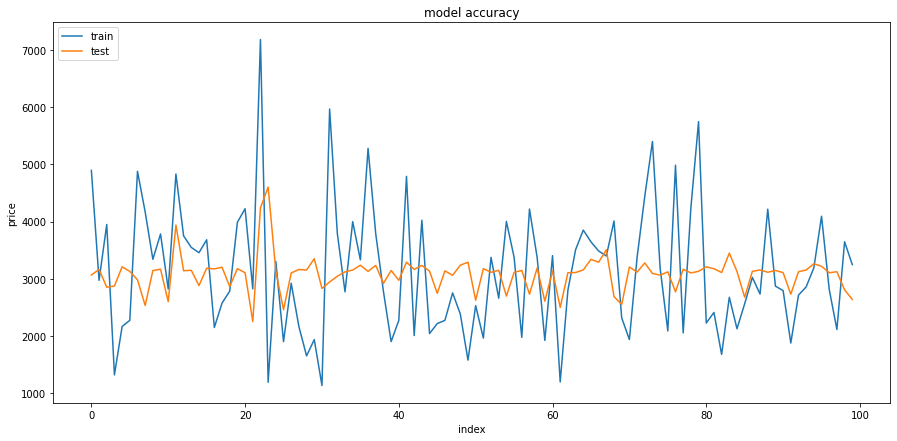

In [42]:
# 실제가격과 예측가격 그래프 비교하기
import matplotlib.pyplot as plt

plt.figure(figsize=[15, 7])
plt.plot(compare_result['avgPrice'][:100])
plt.plot(compare_result['pred_price'][:100])
plt.title('model accuracy')
plt.ylabel("price")
plt.xlabel("index")
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()